In [51]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

In [52]:
data = pd.read_csv('covid19_tweets.csv')

In [53]:
# A quick view of the data
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [54]:
# Number of columns  
counter = 0
for i in data.columns:
    counter += 1
print(counter, 'columns')

13 columns


In [55]:
# A general view of numeric variables in the data
data.describe()

,user_followers,user_friends,user_favourites
count,7.443600e+04,74436.000000,7.443600e+04
mean,1.059513e+05,2154.721170,1.529747e+04
std,8.222900e+05,9365.587474,4.668971e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.660000e+02,153.000000,2.200000e+02
50%,9.600000e+02,552.000000,1.927000e+03
75%,5.148000e+03,1780.250000,1.014800e+04
max,1.389284e+07,497363.000000,2.047197e+06


In [56]:
# Numeric view of how the variables correlate
data.corr(method = 'pearson')

,user_followers,user_friends,user_favourites,user_verified,is_retweet
user_followers,1.000000,-0.002722,-0.028724,0.322896,NaN
user_friends,-0.002722,1.000000,0.207825,0.013099,NaN
user_favourites,-0.028724,0.207825,1.000000,-0.060316,NaN
user_verified,0.322896,0.013099,-0.060316,1.000000,NaN
is_retweet,NaN,NaN,NaN,NaN,NaN


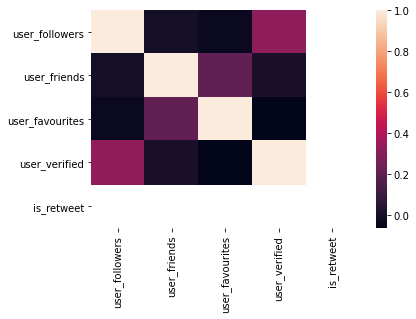

In [57]:
# Graphic view of the correlation table
sns.heatmap(data.corr(method='pearson'))
plt.show()

In [58]:
print(data.shape,'before changes')
# Removing text duplicates
data.drop_duplicates(subset='text', inplace=True)
print(data.shape, 'after changes')

(74436, 13) before changes
(74312, 13) after changes


In [59]:
# Importing nltk library to Process the text and mining it
from nltk.corpus import stopwords
import nltk

In [60]:
# extra words to be deteted by function
additional_words = ['rt', 'rts', 'retweet']
# Following functions deletes from text "stop words" or words with any value
swords = set().union(stopwords.words('english'), additional_words)

# New column with processed data will be added to the data
data['processed_txt'] = data['text'].str.lower()\
          .str.replace('(@[a-z0-9]+)\w+',' ')\
          .str.replace('(http\S+)', ' ')\
          .str.replace('([^0-9a-z \t])',' ')\
          .str.replace(' +',' ')\
          .apply(lambda x: [i for i in x.split() if not i in swords])
print(data['processed_txt'])

0        [smelled, scent, hand, sanitizers, today, some...
1               [hey, made, sense, players, pay, respects]
2        [trump, never, claimed, covid19, hoax, claim, ...
3        [one, gift, covid19, give, appreciation, simpl...
4        [25, july, media, bulletin, novel, coronavirus...
                               ...                        
74431    [far, summer, filled, lawn, mower, gas, often,...
74432    [icymi, replay, techintersect, 16, isaiah, jac...
74433    [community, workers, tianshan, district, urumq...
74434    [responsible, media, warn, us, deadly, uninten...
74435    [maga, covid19, cold, amp, gone, stupid, liber...
Name: processed_txt, Length: 74312, dtype: object


In [61]:
# Importing library that deletes ing, ed ,etc.. word endings
from nltk.stem import PorterStemmer

In [62]:
ps = PorterStemmer()
data['stemmed'] = data['processed_txt'].apply(lambda x: [ps.stem(i) for i in x if i != ''])

In [63]:
# Return endings without unnecesary word endings
data['stemmed'].head(n=10)

0    [smell, scent, hand, sanit, today, someon, pas...
1              [hey, made, sens, player, pay, respect]
2    [trump, never, claim, covid19, hoax, claim, ef...
3    [one, gift, covid19, give, appreci, simpl, thi...
4    [25, juli, media, bulletin, novel, coronavirus...
5    [coronaviru, covid19, death, continu, rise, al...
6    [covid19, chang, work, gener, recruit, specif,...
7    [wear, face, cover, shop, includ, visit, local...
8    [pray, good, health, recoveri, covid19, covidp...
9    [pope, god, prophet, sadhu, sundar, selvaraj, ...
Name: stemmed, dtype: object

In [64]:
# Importing library for 
import nltk.sentiment.vader as vd
from nltk.tokenize import word_tokenize

In [65]:
sentiment_analizer = vd.SentimentIntensityAnalyzer()

In [66]:
# Function to add the sentiment score to new sentiment column in data, with use of
# SentimentIntensityAnalyzer function
data['sentiment_score'] = data['processed_txt'].apply(lambda x: sum([ sentiment_analizer.polarity_scores(i)['compound'] for i in word_tokenize( ' '.join(x) )]) )

In [67]:
# Printing the username, stemmed/clean text and its sentiment score
data[['user_name' ,'stemmed', 'sentiment_score']].head(n=10)

,user_name,stemmed,sentiment_score
0,ᏉᎥ☻լꂅϮ,"[smell, scent, hand, sanit, today, someon, pas...",0.4939
1,Tom Basile 🇺🇸,"[hey, made, sens, player, pay, respect]",0.2155
2,Time4fisticuffs,"[trump, never, claim, covid19, hoax, claim, ef...",-0.2732
3,ethel mertz,"[one, gift, covid19, give, appreci, simpl, thi...",0.9510
4,DIPR-J&K,"[25, juli, media, bulletin, novel, coronavirus...",0.3182
5,🎹 Franz Schubert,"[coronaviru, covid19, death, continu, rise, al...",-0.4651
6,hr bartender,"[covid19, chang, work, gener, recruit, specif,...",0.0000
7,Derbyshire LPC,"[wear, face, cover, shop, includ, visit, local...",0.0000
8,Prathamesh Bendre,"[pray, good, health, recoveri, covid19, covidp...",0.8016
9,Member of Christ 🇨🇳🇺🇸🇮🇳🇮🇩🇧🇷🇳🇬🇧🇩🇷🇺,"[pope, god, prophet, sadhu, sundar, selvaraj, ...",0.2732


In [69]:
# Checking max, mins and mean of this variable
data['sentiment_score'].describe()

count    74312.000000
mean         0.078591
std          0.516008
min         -4.744900
25%         -0.102700
50%          0.000000
75%          0.401900
max          4.354500
Name: sentiment_score, dtype: float64

In [70]:
# Adding a new column for califint its sentiment score
def levels(x):
    if x <= -4:
        return 1
    elif x > -4 and x <= -2:
        return 2
    elif x >= -1 and x <=1:
        return 3
    elif x <= 2 and x < 4:
        return 3
    elif x >= 4:
        return 5
data['feelings'] = data['sentiment_score'].apply(levels)

In [71]:
data['feelings'].describe()

count    74173.000000
mean         2.998638
std          0.038311
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: feelings, dtype: float64

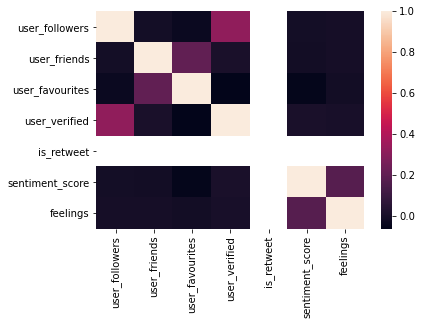

In [72]:
dt = data.corr(method='pearson')
sns.heatmap(dt)
plt.show()

In [84]:
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,processed_txt,stemmed,sentiment_score,feelings
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,"[smelled, scent, hand, sanitizers, today, some...","[smell, scent, hand, sanit, today, someon, pas...",0.4939,3.0
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,"[hey, made, sense, players, pay, respects]","[hey, made, sens, player, pay, respect]",0.2155,3.0
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,"[trump, never, claimed, covid19, hoax, claim, ...","[trump, never, claim, covid19, hoax, claim, ef...",-0.2732,3.0
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,"[one, gift, covid19, give, appreciation, simpl...","[one, gift, covid19, give, appreci, simpl, thi...",0.9510,3.0
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,"[25, july, media, bulletin, novel, coronavirus...","[25, juli, media, bulletin, novel, coronavirus...",0.3182,3.0


In [82]:
print(data.groupby('feelings').size())

feelings
1.0        1
2.0      101
3.0    74070
5.0        1
dtype: int64


In [83]:
data['feelings'].value_counts()

3.0    74070
2.0      101
5.0        1
1.0        1
Name: feelings, dtype: int64

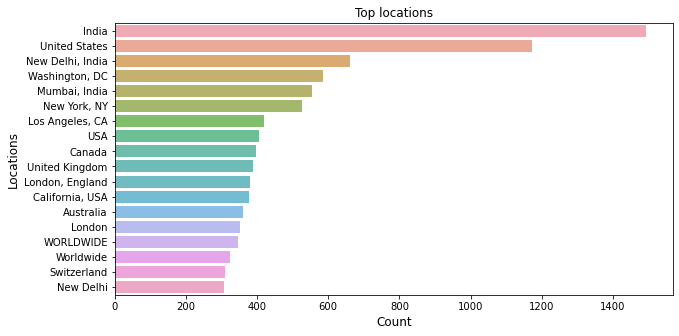

In [142]:
# Finding the most common locations in the data set
locations = data['user_location'].value_counts()
top_locations = locations[locations>=300]
plt.figure(figsize=(10,5))
sns.barplot(top_locations.values, top_locations.index, alpha=0.8)
plt.title('Top locations')
plt.ylabel('Locations', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.show()

In [97]:
locations[locations>=400]

India               1493
United States       1172
New Delhi, India     660
Washington, DC       586
Mumbai, India        554
New York, NY         527
Los Angeles, CA      420
USA                  405
Name: user_location, dtype: int64

In [98]:
# Adding a new column for califint its sentiment score
def levels(x):
    if x == 'India':
        return 1
    elif x == 'United States':
        return 2
    elif x == 'New Delhi, India':
        return 3
    elif x == 'Washington, DC':
        return 4
    elif x == 'Mumbai, India':
        return 5
    elif x == 'New York, NY':
        return 6
    elif x == 'Los Angeles, CA':
        return 7
    elif x == 'USA':
        return 8
    else:
        return 0
data['number_location'] = data['user_location'].apply(levels)

In [99]:
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,processed_txt,stemmed,sentiment_score,feelings,number_location
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,"[smelled, scent, hand, sanitizers, today, some...","[smell, scent, hand, sanit, today, someon, pas...",0.4939,3.0,0
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,"[hey, made, sense, players, pay, respects]","[hey, made, sens, player, pay, respect]",0.2155,3.0,6
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,"[trump, never, claimed, covid19, hoax, claim, ...","[trump, never, claim, covid19, hoax, claim, ef...",-0.2732,3.0,0
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,"[one, gift, covid19, give, appreciation, simpl...","[one, gift, covid19, give, appreci, simpl, thi...",0.9510,3.0,0
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,"[25, july, media, bulletin, novel, coronavirus...","[25, juli, media, bulletin, novel, coronavirus...",0.3182,3.0,0


In [141]:
data['number_location'].value_counts()

0    68495
1     1493
2     1172
3      660
4      586
5      554
6      527
7      420
8      405
Name: number_location, dtype: int64

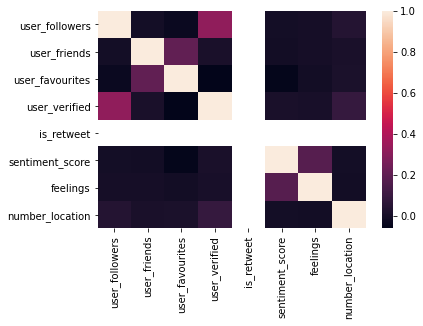

In [100]:
dt = data.corr(method='pearson')
sns.heatmap(dt)
plt.show()

In [89]:
data['feelings']

0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
74431    3.0
74432    3.0
74433    3.0
74434    3.0
74435    3.0
Name: feelings, Length: 74312, dtype: float64

In [91]:
data['user_location']

0                  astroworld
1                New York, NY
2            Pewee Valley, KY
3        Stuck in the Middle 
4           Jammu and Kashmir
                 ...         
74431           Lexington, KY
74432           😷 #stayathome
74433             北京, 中华人民共和国
74434                     NaN
74435             Chicago, IL
Name: user_location, Length: 74312, dtype: object

In [114]:
sources = data['source'].value_counts()
top_sources = sources[sources>=800]
top_sources

Twitter Web App        22959
Twitter for Android    16737
Twitter for iPhone     15822
TweetDeck               3444
Hootsuite Inc.          2843
Twitter for iPad        1882
Buffer                  1081
Instagram                854
Name: source, dtype: int64

In [115]:
# Adding a new column for califint its sentiment score
def the_sources(x):
    if x == 'Twitter Web App':
        return 1
    elif x == 'Twitter for Android':
        return 2
    elif x == 'Twitter for iPhone':
        return 3
    elif x == 'TweetDeck':
        return 4
    elif x == 'Hootsuite Inc.':
        return 5
    elif x == 'Twitter for iPad':
        return 6
    elif x == 'Buffer':
        return 7
    elif x == 'Instagram':
        return 8
    else:
        return 0
data['number_source'] = data['source'].apply(the_sources)

In [116]:
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,processed_txt,stemmed,sentiment_score,feelings,number_location,number_source
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,"[smelled, scent, hand, sanitizers, today, some...","[smell, scent, hand, sanit, today, someon, pas...",0.4939,3.0,0,3
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,"[hey, made, sense, players, pay, respects]","[hey, made, sens, player, pay, respect]",0.2155,3.0,6,2
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,"[trump, never, claimed, covid19, hoax, claim, ...","[trump, never, claim, covid19, hoax, claim, ef...",-0.2732,3.0,0,2
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,"[one, gift, covid19, give, appreciation, simpl...","[one, gift, covid19, give, appreci, simpl, thi...",0.9510,3.0,0,3
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,"[25, july, media, bulletin, novel, coronavirus...","[25, juli, media, bulletin, novel, coronavirus...",0.3182,3.0,0,2


C:\Users\Gar-m\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


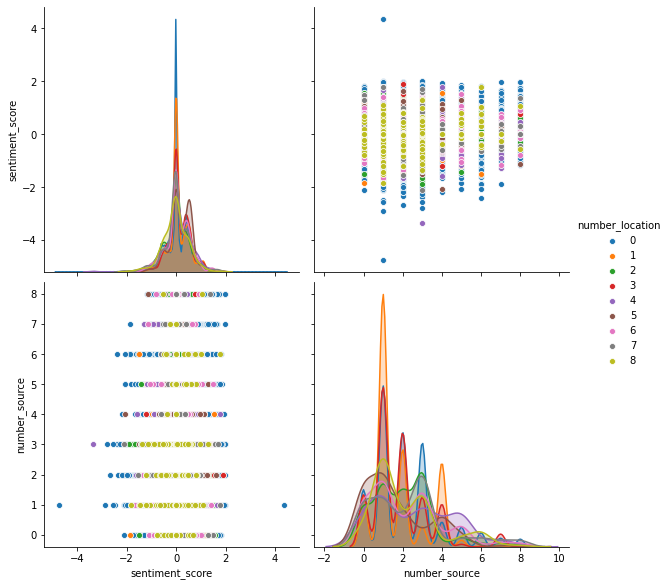

In [117]:
sns.pairplot(data.dropna(), hue='number_location', size=4, vars=['sentiment_score', 'number_source'], kind='scatter')

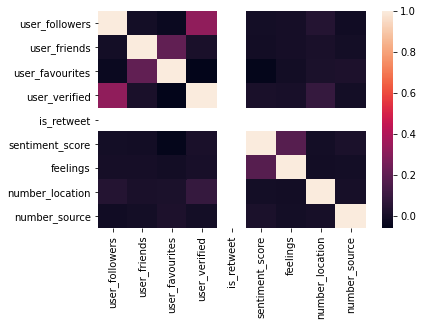

In [118]:
dt = data.corr(method='pearson')
sns.heatmap(dt)
plt.show()

In [120]:
X = np.array(data[['sentiment_score', 'number_source']])
y = np.array(data['number_location'])
X.shape

(74312, 2)

In [129]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

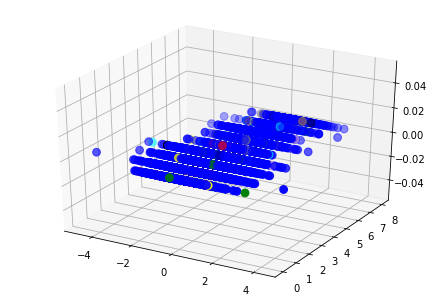

In [127]:

fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], c=asignar,s=60)

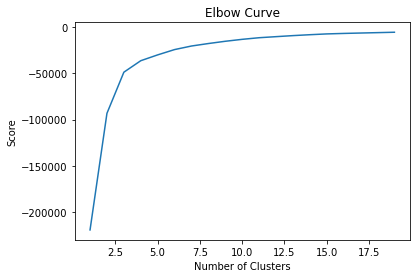

In [130]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [131]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.09491329 5.39830688]
 [0.07531149 0.72542576]
 [0.06460473 3.17876051]
 [0.20459561 7.44134367]
 [0.08171445 2.        ]]


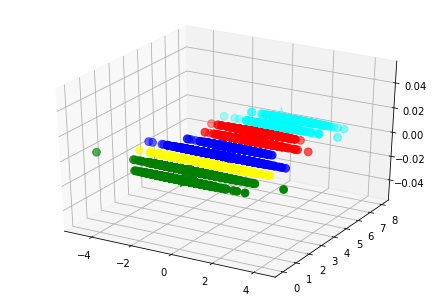

In [133]:
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)

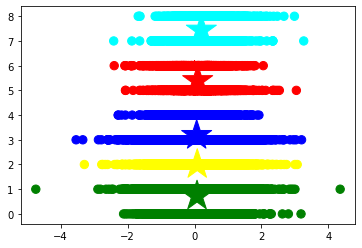

In [135]:
f1 = data['sentiment_score'].values
f2 = data['number_source'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [137]:
copy =  pd.DataFrame()
copy['user_name']=data['user_name'].values
copy['number_location']=data['number_location'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,4725
1,green,31649
2,blue,19266
3,cyan,1935
4,yellow,16737


In [140]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['number_location']=[0,1,2,3,4,5,6,7,8]
diversidadGrupo['cantidad']=group_referrals.groupby('number_location').size()
diversidadGrupo

,number_location,cantidad
0,0,4377
1,1,20
2,2,62
3,3,4
4,4,106
5,5,26
6,6,56
7,7,30
8,8,44
